# 0. Linear Regression

In [55]:
import numpy as np

def linear_regression(X, Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    covariance = sum((x - X_mean) * (y - X_mean) for x, y in zip(X, Y) ) / (len(X) - 1)
    X_std = np.sqrt((sum((x - X_mean)**2 for x in X)) / (len(X) - 1))
    Y_std = np.sqrt((sum((y - Y_mean)**2 for y in Y)) / (len(Y) - 1))
    pearson = covariance / (X_std * Y_std)
    beta1 = pearson * (Y_std / X_std)
    beta0 = Y_mean - (beta1 * X_mean)

    return f"𝛽1={beta1}", f"𝛽0={beta0}"


In [57]:
X = [1,3,6,7,12,25,45]
Y = [2,4,6,12,23,36,56]

linear_regression(X, Y)

('𝛽1=1.2520629437727884', '𝛽0=2.1493955094991364')

In [58]:
from scipy.stats import linregress
linregress(X, Y)

LinregressResult(slope=1.2520629437727884, intercept=2.1493955094991364, rvalue=0.9859832044840525, pvalue=4.4341128766808625e-05, stderr=0.09475099898093386, intercept_stderr=1.9249016662446332)

In [59]:
import pandas as pd

kirb21_df = pd.read_csv("https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv")
kirb21_df.head()

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15.0,295.0,193.5488,32.2733,1,1,127,1378295,1268519
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,127,1378295,1268519
4,5,kirby127a_3_1_ax.img,Mesencephalon,10268,55.0,307.0,230.8583,29.2249,1,1,127,1378295,1268519


In [60]:
L_telencephalon = kirb21_df[kirb21_df['roi'] == 'Telencephalon_L']
R_telencephalon = kirb21_df[kirb21_df['roi'] == 'Telencephalon_R']
L_telencephalon_V = L_telencephalon['volume']
R_telencephalon_V = R_telencephalon['volume']

# left telencelphalon (predictor) to the right telencephalon (outcome)
linear_regression(L_telencephalon_V, R_telencephalon_V)

('𝛽1=1.0442415398322407', '𝛽0=-13875.944799423509')

In [61]:
linregress(L_telencephalon_V, R_telencephalon_V)

LinregressResult(slope=1.044241539832241, intercept=-13875.944799423742, rvalue=0.996035700447307, pvalue=2.263810124403753e-20, stderr=0.021981493268417158, intercept_stderr=11062.183921530188)

In [62]:
# right telencelphalon (predictor) to the left telencephalon (outcome)
linear_regression(R_telencephalon_V, L_telencephalon_V)

('𝛽1=0.9500552111008128', '𝛽0=17150.431045804115')

In [63]:
linregress(R_telencephalon_V, L_telencephalon_V)

LinregressResult(slope=0.9500552111008129, intercept=17150.431045804056, rvalue=0.996035700447307, pvalue=2.263810124403753e-20, stderr=0.019998852210755903, intercept_stderr=10233.546278423977)

In [64]:
L_telecephalon_t1l1 = kirb21_df[(kirb21_df['roi'] == 'Telencephalon_L') & (kirb21_df['type'] == 1) & (kirb21_df['level'] == 1)]
R_telecephalon_t1l1 = kirb21_df[(kirb21_df['roi'] == 'Telencephalon_R') & (kirb21_df['type'] == 1) & (kirb21_df['level'] == 1)]
L_telecephalon_V_t1l1 = L_telencephalon['volume']
R_telecephalon_V_t1l1 = R_telencephalon['volume']

0        531111
836      545603
1672     483107
2508     558849
3344     509945
4180     538936
5016     506151
5852     457862
6688     551654
7524     482556
8360     483496
9196     373246
10032    526596
10868    468915
11704    516579
12540    467063
13376    486629
14212    557758
15048    468971
15884    512967
Name: volume, dtype: int64 1        543404
837      552216
1673     490805
2509     568830
3345     518902
4181     541024
5017     516742
5853     461817
6689     570542
7525     490654
8361     488470
9197     380492
10033    543440
10869    473350
11705    519582
12541    470488
13377    495646
14213    572435
15049    476112
15885    519178
Name: volume, dtype: int64


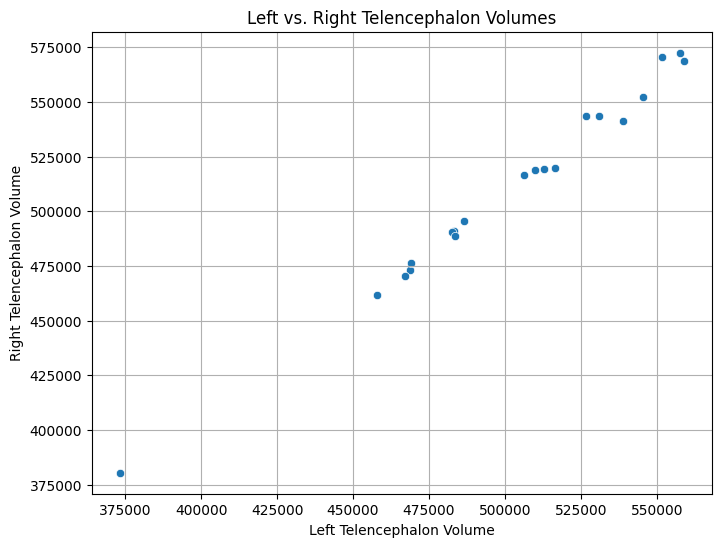

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = pd.DataFrame({
    'Left Telencephalon Volume': L_telecephalon_V_t1l1.values,
    'Right Telencephalon Volume': R_telecephalon_V_t1l1.values
})

plt.figure(figsize=(8, 6))
sns.scatterplot(data = plot_df, x = 'Left Telencephalon Volume', y = 'Right Telencephalon Volume')
plt.title('Left vs. Right Telencephalon Volumes')
plt.xlabel('Left Telencephalon Volume')
plt.ylabel('Right Telencephalon Volume')
plt.grid(True)
plt.show()

### 2.
 When replacing X by cX where c is a positive constant, we are scaling the X value by c. 
 Y = B*(c*X)
 Y = (c*B)*X
The new estimate of B, B' is (1/c)*B (i.e. B' = (1/c)*B)

### 3.
For observations in $G0$, where $X_i = 0$, $\hat{Y}$ = $\hat{\beta}_0$, which means the average outcome for observations in $G0$.

Similarly, for observations in $G1$, where $X_i = 1$, the predicted $\hat{Y}$ simplifies to $\hat{\beta}_0 + \hat{\beta}_1$, which means the average outcome in $G1$.


In [72]:
import numpy as np
import statsmodels.api as sm

# Parameters
n = 100  # Number of observations for each group
np.random.seed(0)

# Simulate data for Group 0 and Group 1
Y0 = np.random.normal(100, 20, n)  # Group 0 data (mean 100, sd 20)
Y1 = np.random.normal(200, 20, n)  # Group 1 data (mean 200, sd 20)

# Combine into a single dataset
Y = np.concatenate((Y0, Y1))
X = np.concatenate((np.zeros(n), np.ones(n)))  # Group indicators: 0 for Group 0, 1 for Group 1

# Add a constant for the intercept term
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(Y, X).fit()

# The predicted values
Y_pred = model.predict(X)

# Compute the means of the predicted values for each group
mean_pred_group_0 = Y_pred[X[:, 1] == 0].mean()
mean_pred_group_1 = Y_pred[X[:, 1] == 1].mean()
difference = mean_pred_group_1 - mean_pred_group_0

# Print the coefficients and the means
model.params, mean_pred_group_0, mean_pred_group_1, difference

# We can see from the output, beta0 = mean_pred_group_0, beta1 = difference


(array([101.19616031, 100.4440991 ]),
 101.1961603106897,
 201.64025941495663,
 100.44409910426693)

### 4. 
Standardized version of $Y$:

$$
Z_Y = \frac{Y - \text{mean}(Y)}{\text{std}(Y)}
$$

Standardized version of $X$:

$$
Z_X = \frac{X - \text{mean}(X)}{\text{std}(X)}
$$

When we perform linear regression with these standardized variables, the regression function with slope $\beta$ is:

$$
Z_Y = \beta Z_X + \epsilon
$$

and the value of $\beta$ is calculated as:

$$
\beta = Cor(Z_X, Z_Y) \frac{\text{std}(Z_Y)}{\text{std}(Z_X)}
$$

and the standard deviations for standardized $Y$ ($Z_Y$) and standardized $X$ ($Z_X$) are both 1. Therefore, $\beta$ = $Cor(X, Y)$.

The same holds true if we regress $X$ on $Y$; the slope will still be $Cor(X, Y)$ because correlation is symmetrical—it does not depend on which variable is considered the predictor and which is the response.

